In [47]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
# from erddapClient import ERDDAP_Griddap
from netCDF4 import Dataset
import cmocean
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from scipy.stats import linregress
import pandas as pd
from statsmodels.tsa.seasonal import STL

In [53]:
# Global Ocean Colour (Copernicus-GlobColour), Bio-Geo-Chemical, L4 (monthly and interpolated) from Satellite Observations (Near Real Time)
file_id = Dataset('/home/jamie/projects/climate/data/chl/chl_1998_2023_l4_month_multi_4k.nc')
chl = file_id.variables["CHL"][:]
time = file_id.variables["time"][:]
lat = file_id.variables["latitude"][:]
lon = file_id.variables["longitude"][:]
file_id.close()

# Global Ocean Colour (Copernicus-GlobColour), Bio-Geo-Chemical, L4 (monthly and interpolated) from Satellite Observations (Near Real Time)
file_id = Dataset('/home/jamie/projects/climate/data/chl/clim_stl_mon_20240831.nc')
clim = file_id.variables["CHL"][:]
file_id.close()

# Global Ocean Colour (Copernicus-GlobColour), Bio-Geo-Chemical, L4 (monthly and interpolated) from Satellite Observations (Near Real Time)
file_id = Dataset('/home/jamie/projects/climate/data/chl/chla_stl_mon_20240831.nc')
chla = file_id.variables["CHL"][:]
file_id.close()

# Global Ocean Colour (Copernicus-GlobColour), Bio-Geo-Chemical, L4 (monthly and interpolated) from Satellite Observations (Near Real Time)
file_id = Dataset('/home/jamie/projects/climate/data/chl/seas_stl_mon_20240902.nc')
seas = file_id.variables["CHL"][:]
file_id.close()

In [49]:
### Subset the reagion of interest. 

# Define the region of interest (ROI)
lat_min, lat_max = 22.5, 34   # Example latitude bounds (e.g., 30N to 50N)
lon_min, lon_max = -163, -132  # Example longitude bounds (e.g., 130W to 60W)

# Find the indices that match the ROI
lat_indices = np.where((lat >= lat_min) & (lat <= lat_max))[0]
lon_indices = np.where((lon >= lon_min) & (lon <= lon_max))[0]

# Subset the 3D array
chl  = chl[:, lat_indices.min():lat_indices.max() + 1, lon_indices.min():lon_indices.max() + 1]
chla = chla[:, lat_indices.min():lat_indices.max() + 1, lon_indices.min():lon_indices.max() + 1]
clim = clim[:, lat_indices.min():lat_indices.max() + 1, lon_indices.min():lon_indices.max() + 1]
seas = seas[:, lat_indices.min():lat_indices.max() + 1, lon_indices.min():lon_indices.max() + 1]


In [54]:
timedelta_vector = (time * np.timedelta64(1, 'D')).astype('timedelta64[ns]')
base_date = np.datetime64('1900-01-01')
date_vector = base_date + timedelta_vector
chl_time = pd.to_datetime(date_vector)

# average the time series
chl_ts = np.mean(chl, axis = (1,2))
clim_ts = np.mean(clim, axis = (1,2))
chla_ts = np.mean(chla, axis = (1,2))
seas_ts = np.mean(seas, axis = (1,2))

# Create a Pandas DataFrame for each time series
df1 = pd.DataFrame({'Date': chl_time, 'Values': chl_ts}).set_index('Date')
df2 = pd.DataFrame({'Date': chl_time, 'Values': seas_ts}).set_index('Date')
df3 = pd.DataFrame({'Date': chl_time, 'Values': clim_ts}).set_index('Date')
df4 = pd.DataFrame({'Date': chl_time, 'Values': chla_ts}).set_index('Date')


In [55]:
idx1 = df3.index > '1998-08-01'
idx2 = df3.index < '2023-08-01'
idx = idx1 & idx2

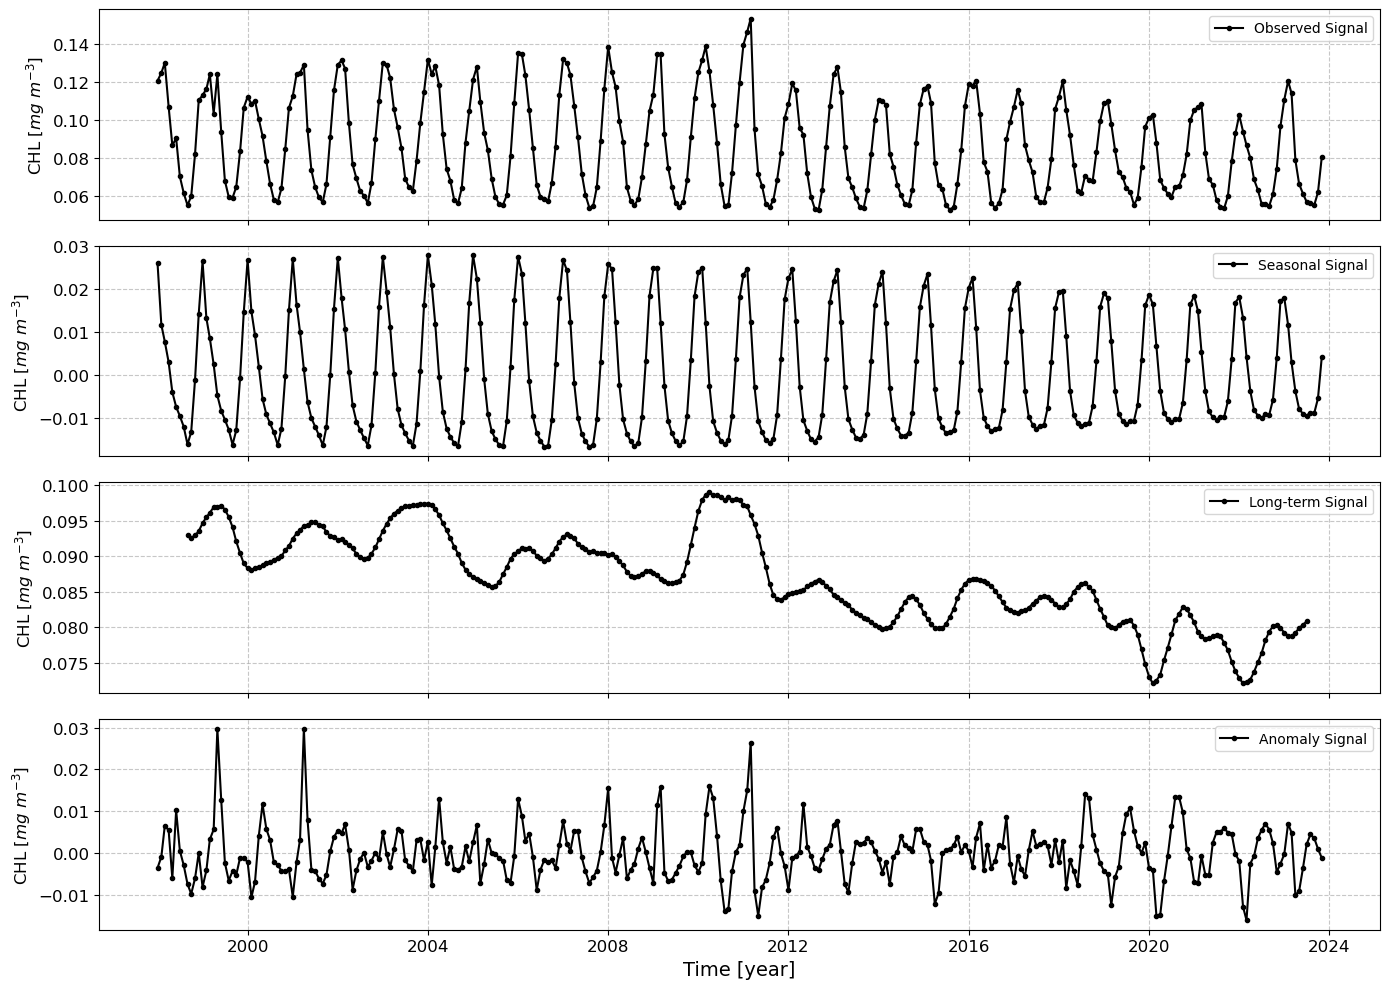

In [56]:

# Set up the figure and axes
fig, axs = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

# Plot each time series
axs[0].plot(df1.index, df1['Values'], color='black', marker='.', linestyle='-', label='Observed Signal')
axs[1].plot(df2.index, df2['Values'], color='black', marker='.', linestyle='-', label='Seasonal Signal')
axs[2].plot(df3.index[idx], df3['Values'][idx], color='black', marker='.', linestyle='-', label='Long-term Signal')
axs[3].plot(df4.index, df4['Values'], color='black', marker='.', linestyle='-', label='Anomaly Signal')

# Adding titles
axs[0].set_title('', fontsize=14)

for ax in axs:
    ax.grid(True, alpha=0.7, linestyle = '--')
    ax.legend(loc='upper right')
    ax.set_ylabel('CHL [$mg$ $m^{-3}$]', fontsize=12)

    ax.tick_params(axis='both', which='major', labelsize=12)

# Add a common x-axis label
plt.xlabel('Time [year]', fontsize=14)
# Improve the layout
plt.tight_layout()
plt.savefig('../../figures/stl_decomp_20240903.png', bbox_inches='tight', dpi=300)
# Show the plot
plt.show()